# Pyber Rideshare Analysis

Observations:

  With a presence in all three city types of urban, suburban, and rural, Pyber solidifies its hold on the market. Findings to     keep in mind as Pyber seeks to strengthen and grow:
  
  Urban cities far exceed suburban and rural cities in number of drivers, total fares, and total rides and are dependent on a     high volume of requested rides.
  
  Suburban cities overall strike more balance between total rides and average fares. 
  
  Rural cities bring in the highest fares per ride, yet only 6.8% of sum total of fares.
  
  
  Further analysis is recommended to determine how these facts impact both employees and riders.
  
  Limitations: Length of trips data not included.
  
  
  

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

#Read City and Ride Data and drop nulls
city_df = pd.read_csv(city_data_to_load).dropna()
ride_df = pd.read_csv(ride_data_to_load).dropna()

#Drop any duplicates in dataframe
city_df = city_df.drop_duplicates('city', keep = 'first')

#Merge two datasets
merge_df = city_df.merge(ride_df, on = 'city')

# Display data table
merge_df.head(3)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416


## Bubble Plot of Ride Sharing Data

In [2]:
## Obtain the x (total rides per city) and y (average fare per city) coordinates for each of three city types
#Group by city type
city_group = merge_df.groupby(['city','type'])

#Assign total rides per city
total_rides = city_group['ride_id'].count()

#Assign average fare by city
avg_fare = city_group['fare'].mean()

#Assign average number of drivers per city
num_drivers = city_group['driver_count'].mean()

In [15]:
#Summary dataframe
ride_info_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Average Fare": avg_fare,
    "Number of Drivers": num_drivers})

ride_info_df = ride_info_df.sort_values('Number of Drivers', ascending = False)
ride_info_df.head(3)

,,Total Rides,Average Fare,Number of Drivers
city,type,,,
West Samuelburgh,Urban,25,21.767600,73
South Michelleport,Urban,31,24.451613,72
West Anthony,Urban,30,24.736667,70


In [4]:
#Reset index to include city and type
ride_info_df = ride_info_df.reset_index()
ride_info_df=ride_info_df[['city', 'type', 'Total Rides', 'Average Fare', 'Number of Drivers']]

ride_info_df.head(3)

,city,type,Total Rides,Average Fare,Number of Drivers
0,West Samuelburgh,Urban,25,21.767600,73
1,South Michelleport,Urban,31,24.451613,72
2,West Anthony,Urban,30,24.736667,70


In [5]:
#Group by city type
city_type = ride_info_df.groupby(["type"])

#Subgroups
urban=city_type.get_group("Urban")
suburban = city_type.get_group("Suburban")
rural = city_type.get_group("Rural")

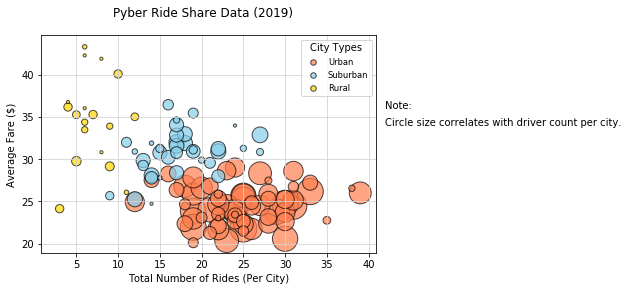

In [6]:
#Scatter plots for each city type
plt.scatter(urban['Total Rides'],urban['Average Fare'],urban['Number of Drivers']*10,edgecolors="black",facecolors="coral",alpha=0.7,label="Urban")
plt.scatter(suburban['Total Rides'],suburban['Average Fare'],suburban['Number of Drivers']*10,edgecolors="black",facecolors="skyblue",alpha=0.7,label="Suburban")
plt.scatter(rural['Total Rides'],rural['Average Fare'],rural['Number of Drivers']*10,edgecolors="black",facecolors="gold",alpha=0.7,label="Rural")

#Format graph
#Title and axis labels
plt.suptitle('Pyber Ride Share Data (2019)')

#x and y axes labels
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#legend
lgnd=plt.legend(title="City Types",loc="upper right",fontsize="small",scatterpoints=1,markerscale=True)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

#Note regarding circle size
plt.text(42,36,"Note:")
plt.text(42,34,"Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Pyber Ride Share Data.png")

## Total Fares by City Type

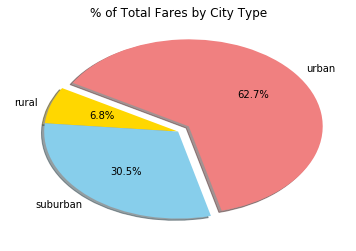

In [13]:
#Sum of fares per type
fares_by_type = merge_df.groupby(["type"])["fare"].sum()

#Sum of  fares and divide for percentages
total_fares = fares_by_type.sum()
pct_fares = fares_by_type / total_fares

#Pie chart
plt.pie(pct_fares, shadow = True, startangle = 150, labels = ["rural","suburban","urban"], explode=[0,0,0.1],colors=["gold","skyblue","lightcoral"],autopct="%1.1f%%")

# chart formatting
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("fares_by_city_type.png")

# Show Figure
plt.show()

## Total Rides by City Type

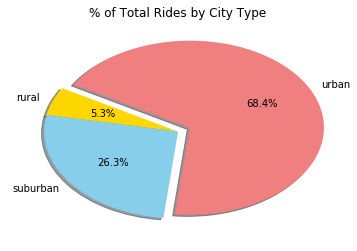

In [16]:
#Group rides by city type
rides_by_type = merge_df.groupby(["type"])["ride_id"].count()

#Calculate Ride Percents
total_fares = rides_by_type.sum()
pct_rides = rides_by_type / total_fares

#Pie chart
plt.pie(pct_rides, shadow = True, startangle = 150, labels = ["rural","suburban","urban"], explode=[0,0,0.1],colors=["gold","skyblue","lightcoral"],autopct="%1.1f%%")

# chart formatting
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("rides_by_city_type.png")

plt.show()

## Total Drivers by City Type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64


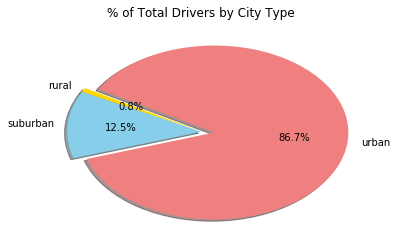

In [21]:
#Group drivers by city type
drivers_by_type = merge_df.groupby(["type"])["driver_count"].sum()

#Calculate Ride Percents
total_drivers = drivers_by_type.sum()
pct_drivers = drivers_by_type / total_drivers

#Pie chart
plt.pie(pct_drivers, shadow = True, startangle = 150, labels = ["rural","suburban","urban"], explode=[0,0,0.1],colors=["gold","skyblue","lightcoral"],autopct="%1.1f%%")

# chart formatting
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("drivers_by_city_type.png")

# Show Figure
plt.show()

